# GRADIENT DECENT IMPLEMENTED ON COMBINED  CYCLE POWER PLANT

In [1]:
import numpy as np
import pandas as pd
import random

## Input x,y,x_test

In [2]:
data=np.genfromtxt('Downloads/ccpp_x_y_train.csv',delimiter=',')
data_test=np.genfromtxt('Downloads/ccpp_x_test.csv',delimiter=',')

In [3]:
x=data[:,0:4]
y=data[:,4]
x_test=data_test

## process

In [4]:
[d0,d1]=x.shape
[dt0,dt1]=x_test.shape
norm=np.zeros([2,d1])

In [5]:
for i in range(d1):
    norm[0,i]=x[:,i].mean()
    norm[1,i]=np.sqrt(x[:,i].var())
    x[:,i]=(x[:,i]-norm[0,i])/norm[1,i]
x

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00]])

In [6]:
for i in range(d1):
    x_test[:,i]=(x_test[:,i]-norm[0,i])/norm[1,i]
x_test

array([[-1.02742256, -0.96138014,  0.72378329,  1.20446479],
       [-1.01136848, -1.25783726, -0.09942787,  0.57331371],
       [ 0.97398614,  1.62360048, -1.27807846,  0.39005424],
       ...,
       [ 0.62748557,  0.93814142, -0.69965107,  1.27284519],
       [ 0.51644485, -0.90099073,  0.11685368, -0.54470581],
       [ 0.28499852,  0.46914312,  0.95515424,  0.80580707]])

In [7]:
mean=y.mean()
sd=np.sqrt(y.var())
y=(y-mean)/sd

In [8]:
xdf=pd.DataFrame(x)
xdf[d1]=np.ones(d0)
x=xdf.values
x

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01,  1.00000000e+00],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01,  1.00000000e+00],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01,  1.00000000e+00],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01,  1.00000000e+00],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01,  1.00000000e+00],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00,  1.00000000e+00]])

In [9]:
xtdf=pd.DataFrame(x_test)
xtdf[d1]=np.ones(dt0)
x_test=xtdf.values
x_test

array([[-1.02742256, -0.96138014,  0.72378329,  1.20446479,  1.        ],
       [-1.01136848, -1.25783726, -0.09942787,  0.57331371,  1.        ],
       [ 0.97398614,  1.62360048, -1.27807846,  0.39005424,  1.        ],
       ...,
       [ 0.62748557,  0.93814142, -0.69965107,  1.27284519,  1.        ],
       [ 0.51644485, -0.90099073,  0.11685368, -0.54470581,  1.        ],
       [ 0.28499852,  0.46914312,  0.95515424,  0.80580707,  1.        ]])

In [10]:
def grad_point(x,y,m,d1,i):
    grad=np.zeros(d1)
    for k in range(d1):
        grad[k]=2*x[i,k]*((m*x[i,:]).sum()-y[i])
    return grad

In [11]:
def grad_cost(x,y,m,d0,d1):
    grad=np.zeros(d1)
    for i in range(d0):
        grad+=grad_point(x,y,m,d1,i)
    return grad/d0

In [12]:
def grad_batch(x,y,m,d0,d1,batch):
    grad=np.zeros(d1)
    index=random.sample(range(d0),batch)
    for i in index:
        grad+=grad_point(x,y,m,d1,i)
    return grad/batch

In [13]:
def gd(x,y,m,d0,d1,lr,limit):
    mn=m
    i=0
    while i< limit:
        mn-=lr*grad_cost(x,y,mn,d0,d1)
        i+=1
    return mn

In [14]:
def sgd(x,y,m,d0,d1,lr,limit):
    mn=m
    i=0
    while i< limit:
        for j in range(d0):
            mn-=lr*grad_point(x,y,mn,d1,j)
        i+=1
    return mn

In [15]:
def bgd(x,y,m,d0,d1,lr,limit,batch):
    mn=m
    i=0
    while i< limit:
        mn-=lr*grad_batch(x,y,mn,d0,d1,batch)
        i+=1
    return mn

In [16]:
[d0,d1]=x.shape
[dt0,dt1]=x_test.shape

In [17]:
m=np.zeros(d1)

In [18]:
lr=.3
mo=bgd(x,y,m,d0,d1,lr,15,60)
print(mo)

[-0.69957288 -0.27355608  0.0827531  -0.06013889 -0.01422754]


In [19]:
from sklearn import linear_model as lm
algo=lm.LinearRegression()
algo.fit(x,y)
print(algo.coef_)
print(algo.intercept_)

[-0.86980688 -0.16892631  0.02041279 -0.13670987  0.        ]
-1.4549681635337864e-15


##  Prediction

In [20]:
y_test=np.zeros(dt0)
for i in range(dt0):
    y_test[i]=(mo*x_test[i,:]).sum()
y_test=(sd*y_test)+mean
y_test

array([470.79334181, 471.47353854, 432.68955148, ..., 439.96593383,
       452.94721964, 449.09664323])

In [21]:
y_test_1=algo.predict(x_test)
y_test_1=(y_test_1*sd)+mean
y_test_1

array([469.95711113, 471.76632733, 433.85647002, ..., 439.13871988,
       450.65930697, 447.27281902])

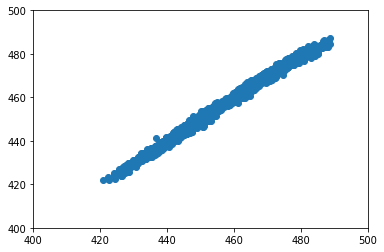

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test_1,y_test)
plt.axis([400,500,400,500])
plt.show()

In [23]:
np.savetxt('Downloads/ccpp_y_predict.csv',y_test,delimiter=',')